In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/benhowey/Downloads/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [141]:
# filter data to only include legendary pokemon and type 1 and type 2 and show counts for each type
data[data['Legendary']==True][['Type 1','Type 2']].value_counts()

Type 1    Type 2  
Dragon    Psychic     4
          Ice         3
Electric  Flying      3
Fire      Flying      2
Ghost     Dragon      2
Ground    Flying      2
Dragon    Flying      2
Rock      Fairy       2
Psychic   Flying      1
          Ghost       1
Dark      Flying      1
Rock      Fighting    1
Steel     Dragon      1
Psychic   Fighting    1
Steel     Fighting    1
          Psychic     1
Psychic   Fire        1
Ground    Fire        1
Psychic   Dark        1
Ice       Flying      1
Dragon    Electric    1
Grass     Flying      1
          Fighting    1
Fire      Water       1
          Steel       1
Dragon    Ground      1
          Fire        1
Water     Dragon      1
dtype: int64

In [153]:
# filter data to only include Type 1 Dragon and Type 2 Psychic and sort by Defense
data[(data['Type 1']=='Dragon') & (data['Type 2']=='Psychic')].sort_values('Defense',ascending=False).reset_index(drop=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
1,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
2,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
3,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True


In [156]:
# return a dataframe with data sorted by Total in descending order
strong=data.sort_values('Total',ascending=False)
strong.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [368]:
# concat Type 1 and Type 2 into a new column called Type and fill in missing values with Type 1
filled=pd.concat([data['Type 1'],data['Type 2'].fillna(data['Type 1'])],axis=1)
filled

,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Fire,Fire
...,...,...
795,Rock,Fairy
796,Rock,Fairy
797,Psychic,Ghost
798,Psychic,Dark


In [377]:
filled.value_counts()
filled[(filled['Type 1']=='Normal') & (filled['Type 2']=='Water')].count()

Type 1    1
Type 2    1
dtype: int64

In [305]:
#set the name as the index
#data = data.set_index('Name')
#return a df of names containing Mega
test=data[data['Name'].str.contains(r'Mega')]['Name']

#remove Mega from all names
data['Name'].str.replace(r'Mega','')

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3        Venusaur Venusaur
4               Charmander
              ...         
795                Diancie
796        Diancie Diancie
797    HoopaHoopa Confined
798     HoopaHoopa Unbound
799              Volcanion
Name: Name, Length: 800, dtype: object

In [9]:
# replace all instances where Name has Mega within the string
data['NonMega']=data['Name'].replace(to_replace=r'Mega',value='',regex=True)

# remove camel case from all names
data['NonMega'].str.replace(r'(?<!^)(?=[A-Z])', ' ', regex=True)

# drop row if Type 2 is NaN
data.dropna(subset=['Type 2'])


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,NonMega
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Ivysaur
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Venusaur
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Venusaur Venusaur
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Charizard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Diancie Diancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,HoopaHoopa Confined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,HoopaHoopa Unbound


In [351]:
#use regex to remove the cammel case
data['Name'].str.replace(r'([A-Z]{1}[a-z]+)',r'\g<0> ',regex=True)

0                    Bulbasaur 
1                      Ivysaur 
2                     Venusaur 
3      Venusaur Mega  Venusaur 
4                   Charmander 
                 ...           
795                    Diancie 
796      Diancie Mega  Diancie 
797      Hoopa Hoopa  Confined 
798       Hoopa Hoopa  Unbound 
799                  Volcanion 
Name: Name, Length: 800, dtype: object

In [222]:
#dropna if anything in the Type2 column has a nan
data[data['Name'].str.contains('Mega')].dropna(subset=['Type 2'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False


<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

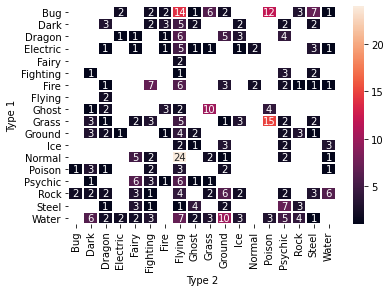

In [396]:
plot_data=data.dropna()

sns.heatmap(plot_data.groupby(['Type 1','Type 2']).size().unstack(),linewidths=1,annot=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


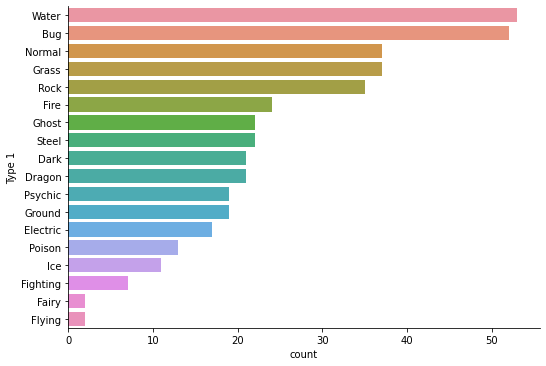

In [401]:
sns.factorplot(y='Type 1',data=plot_data,kind='count',aspect=1.5,order=plot_data['Type 1'].value_counts().index)

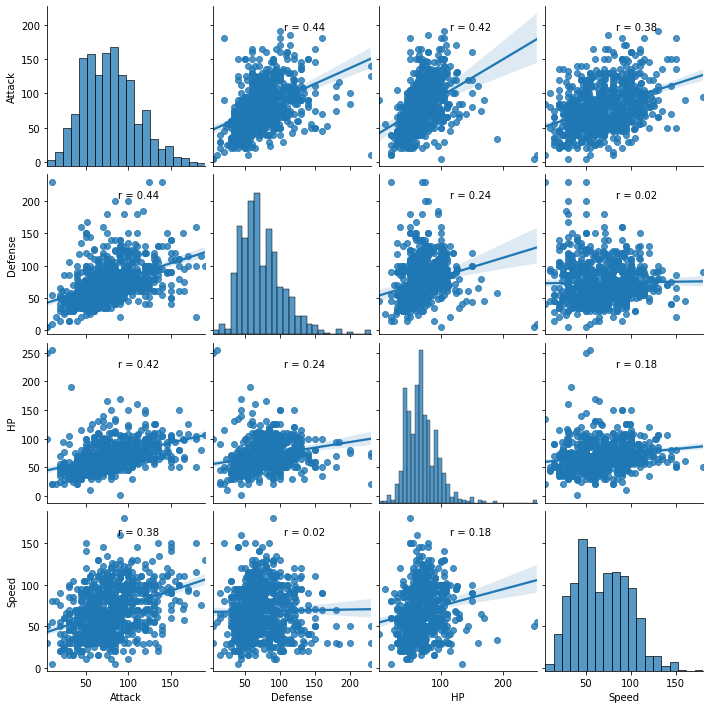

In [414]:
def show_corr(x, y, **kwargs):
    (r, _) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
        xy=(0.45, 0.85),
        xycoords=ax.transAxes
    )

sns.pairplot(data=data[['Type 1','Type 2','Attack','Defense','HP','Speed']],kind='reg').map_offdiag(show_corr)

<AxesSubplot:>

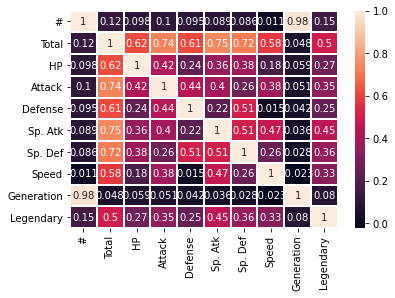

In [417]:
sns.heatmap(data=data.corr(),linewidths=1,annot=True)